# RELATÓRIO SOBRE CORONA VÍRUS NO BRASIL

In [373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [374]:
df = pd.read_csv("brazil_covid19_2.csv")

In [375]:
import collections

Altere a data aqui, quando conseguir o documento com dados de outras data. Esse filtro foi criado para evitar pegar dados com valor zero, por falta de informação

In [376]:
filter_date = df['date'] < '2020-04-04'
df = df[filter_date]
state =  df.drop('state', axis=1).groupby('date').sum().drop('deaths', axis=1)
state.head()


,cases
date,
2020-01-30,0
2020-01-31,0
2020-02-01,0
2020-02-02,0
2020-02-03,0


# Adicionaremos todos os algoritmo Regressão polinomial:

[[   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   1]
 [   1]
 [   2]
 [   2]
 [   2]
 [   2]
 [   3]
 [   7]
 [  13]
 [  19]
 [  25]
 [  25]
 [  34]
 [  52]
 [  77]
 [  98]
 [ 121]
 [ 200]
 [ 234]
 [ 291]
 [ 428]
 [ 621]
 [ 904]
 [1128]
 [1546]
 [1891]
 [2201]
 [2433]
 [2915]
 [3417]
 [3903]
 [4256]
 [4579]
 [5717]
 [6836]
 [7910]
 [9056]]
('Polynomial grau : ', '1')
Day=1, Predicted=145.588259, Expected=200.000000
Day=2, Predicted=283.460763, Expected=234.000000
Day=3, Predicted=270.152500, Expected=291.000000
Day=4, Predicted=351.332279, Expected=428.000000
Day=5, Predicted=572.435857, Expected=621.000000
Day=6, Predicted=824.308361, Expected=904.000000
Day=7, Predicted=1201.924886, Expected=1128.000000
Day=8, Predicted=1363.898498, Expected=1546.000000
Day=9, Predicted=1985.849674, Expected=1891.000000
Day=

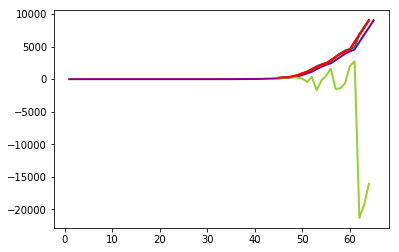

In [377]:
# Para series temporais, usado como base:
# Codigo modificado de  de https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
# Para aplicacao de regressao polinomial
# Teoria base : https://matheusfacure.github.io/2017/02/26/regr-poli/
# Alterado por Nathana

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from matplotlib import pyplot
from datetime import date
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

import numpy
 
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df
 
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
 
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
def scale(train, test):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
 
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
 
# fit Polinomial
def fit_polinomial(train, batch_size, nb_epoch, neurons, degree):
    X, y = train[:, 0:-1], train[:, -1]
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    return model
 

def forecast_polinomial(model, batch_size, X):
    X = X.reshape(1, len(X))
    yhat = model.predict(X)
    return yhat

def last_date(series):
    last_date = series['cases'].index
    last_date = last_date[-1] # Pega a ultima data que se foi testado
    currently_date = date.today().strftime("%Y-%m-%d") # Testa com o dia de hoje
    # Faz a data que queremos descobrir menos a informada para ter numero de dias
    new_date = datetime.strptime(currently_date,"%Y-%m-%d") - datetime.strptime(last_date,"%Y-%m-%d") 
    # Formata numero de dias
    return new_date.days
    
def main():
    # inicializando variaveis e transformando os dados para realizar os calculos
    series = state
    raw_values = series.values
    diff_values = difference(raw_values, 1)
    print(raw_values)
    supervised = timeseries_to_supervised(diff_values, 1)
    supervised_values = supervised.values
    value_test = 20    
    train, test = supervised_values[0:-value_test], supervised_values[-value_test:]
    
    scaler, train_scaled, test_scaled = scale(train, test)
    plt.plot([ i+1 for i in range(0,len(raw_values))], raw_values,color='purple', linewidth=2,
                 label="Todos dados")
    
    
    # treinamento uma regressao polinomial
    repeats = 1
    size_train = len(train_scaled)
    error_scores = list()
    count_test = [ i+size_train+1 for i in range(0,value_test)]
    colors = ['teal', 'yellowgreen', 'orange',  'pink', 'black']
    for count, degree in enumerate([1,2]):
        print('Polynomial grau : ',str(degree))
        for r in range(repeats):
            polinomial = fit_polinomial(train_scaled, 1, 3000, 4, degree)
            train_reshaped = train_scaled
            predictions = list()
            for i in range(len(test_scaled)):
                X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
                yhat = forecast_polinomial(polinomial, 1, X)
                yhat = invert_scale(scaler, X, yhat)
                yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
                predictions.append(yhat)
                expected = raw_values[len(train) + i + 1]
                print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
            plt.plot(count_test, predictions, color=colors[count], linewidth=2,
            label="degree %d" % degree)

        plt.plot(count_test, raw_values[-value_test:],color='red', linewidth=2,
                 label="degree %d" % degree)
        rmse = sqrt(mean_squared_error(raw_values[-value_test:], predictions))
        print('%d) Test RMSE: %.3f' % (r+1, rmse))
        error_scores.append(rmse)
    
    # Prevendo dado futuro

    predict_values = last_date(series)
    size_raw = len(raw_values)

    for i in range(0,predict_values):
        count_day =  np.asarray([[size_raw + i + 1]])
        count_day = count_day.reshape(count_day.shape[0], count_day.shape[1])
        yhat = forecast_polinomial(polinomial, 1, count_day)
        yhat = invert_scale(scaler, count_day, yhat)
        yhat = inverse_difference(raw_values, yhat, 1)
        print('-Day=%d, Predicted=%f' %  (size_raw+i+1, yhat))
        raw_values = np.append(raw_values, yhat)
        
if __name__ == "__main__":
    main()
                        